In [118]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_graphviz
import xgboost as xgb
from xgboost import XGBRegressor
import time
import pickle

# Review, prepare and split the dataset into two datasets: 70% training and 30% test

In [119]:

# read in the cleaned csv

df = pd.read_csv('train_data_2.2.1_change_month.csv')

df

,taxi_zone,datetime,passenger_count,month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0,1,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,2022-01-01 01:00:00,0,1,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2022-01-01 02:00:00,2,1,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,2022-01-01 03:00:00,1,1,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,2022-01-01 04:00:00,8,1,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,2023-04-30 19:00:00,247,4,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,2023-04-30 20:00:00,242,4,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,2023-04-30 21:00:00,210,4,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,2023-04-30 22:00:00,152,4,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


In [120]:
df = df.drop('datetime', axis=1)
df

,taxi_zone,passenger_count,month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,0,1,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,0,1,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2,1,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,1,1,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,8,1,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,247,4,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,242,4,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,210,4,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,152,4,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


In [121]:
df.dtypes

taxi_zone                           int64
passenger_count                     int64
month                               int64
week                                int64
hour                                int64
borough                            object
entertainment_and_recreation        int64
financial_services                  int64
food_and_beverage                   int64
parking_and_automotive_services     int64
professional_services               int64
real_estate                         int64
retail_services                     int64
transportation                      int64
hospital                            int64
hotspots                            int64
school                              int64
total_business                      int64
holiday                            object
dtype: object

In [122]:
df['taxi_zone'] = df['taxi_zone'].astype('category')
df['month'] = df['month'].astype('category')
df['week'] = df['week'].astype('category')
df['hour'] = df['hour'].astype('category')
df['borough'] = df['borough'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df.dtypes

taxi_zone                          category
passenger_count                       int64
month                              category
week                               category
hour                               category
borough                            category
entertainment_and_recreation          int64
financial_services                    int64
food_and_beverage                     int64
parking_and_automotive_services       int64
professional_services                 int64
real_estate                           int64
retail_services                       int64
transportation                        int64
hospital                              int64
hotspots                              int64
school                                int64
total_business                        int64
holiday                            category
dtype: object

# set up dummies features

In [123]:
# set up dummies features
df = pd.get_dummies(df)
df.dtypes

passenger_count                      int64
entertainment_and_recreation         int64
financial_services                   int64
food_and_beverage                    int64
parking_and_automotive_services      int64
                                     ...  
holiday_New Year's Day (Observed)    uint8
holiday_No                           uint8
holiday_Thanksgiving                 uint8
holiday_Veterans Day                 uint8
holiday_Washington's Birthday        uint8
Length: 336, dtype: object

In [124]:
for col in df.columns:
    print(col)

passenger_count
entertainment_and_recreation
financial_services
food_and_beverage
parking_and_automotive_services
professional_services
real_estate
retail_services
transportation
hospital
hotspots
school
total_business
taxi_zone_1
taxi_zone_2
taxi_zone_3
taxi_zone_4
taxi_zone_5
taxi_zone_6
taxi_zone_7
taxi_zone_8
taxi_zone_9
taxi_zone_10
taxi_zone_11
taxi_zone_12
taxi_zone_13
taxi_zone_14
taxi_zone_15
taxi_zone_16
taxi_zone_17
taxi_zone_18
taxi_zone_19
taxi_zone_20
taxi_zone_21
taxi_zone_22
taxi_zone_23
taxi_zone_24
taxi_zone_25
taxi_zone_26
taxi_zone_27
taxi_zone_28
taxi_zone_29
taxi_zone_30
taxi_zone_31
taxi_zone_32
taxi_zone_33
taxi_zone_34
taxi_zone_35
taxi_zone_36
taxi_zone_37
taxi_zone_38
taxi_zone_39
taxi_zone_40
taxi_zone_41
taxi_zone_42
taxi_zone_43
taxi_zone_44
taxi_zone_45
taxi_zone_46
taxi_zone_47
taxi_zone_48
taxi_zone_49
taxi_zone_50
taxi_zone_51
taxi_zone_52
taxi_zone_53
taxi_zone_54
taxi_zone_55
taxi_zone_56
taxi_zone_57
taxi_zone_58
taxi_zone_59
taxi_zone_60
taxi_zone_

# Shuffle and split the dataset into two datasets: 70% training and 30% test

In [125]:
# shuffle the data
df = df.sample(frac=1, random_state=987)
print(df.head(5))

         passenger_count  entertainment_and_recreation  financial_services  \
228483                 0                             4                   2   
208468                 2                             0                  12   
2144853                3                             1                   2   
174233                 0                             3                   0   
1564157               13                            41                   0   

         food_and_beverage  parking_and_automotive_services  \
228483                   0                               17   
208468                   0                               10   
2144853                  0                               12   
174233                   0                                7   
1564157                  2                               29   

         professional_services  real_estate  retail_services  transportation  \
228483                      31           65               97            

In [126]:
# split data set to training data and test data
y = pd.DataFrame(df["passenger_count"])
X = df.drop(labels=["passenger_count"], axis=1)

# divide data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [127]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,26,5,0,11,19,43,106,9,0,63,...,0,0,0,0,0,0,1,0,0,0
1,6,1,0,24,12,393,202,2,0,29,...,0,0,0,0,0,0,1,0,0,0
2,0,2,0,7,6,10,60,0,0,4,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,30,0,10,27,4,0,15,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,5,6,29,66,0,0,4,...,0,0,0,0,0,0,1,0,0,0


# use XGboost regression

# instantiate the model

In [128]:
# record the start time
start_time = time.time()


# instantiate the model
xgb = XGBRegressor(n_estimators=200, max_depth=15, learning_rate=0.2, random_state=1)



# the model will output negative value, so use log operation to reduce negative value
# Transform the target variable
y_train = y_train

# fit the model
xgb.fit(X_train, y_train)

# calculate and print the time taken
time_taken = time.time() - start_time
print(f"Time taken to fit the model: {time_taken} seconds")

Time taken to fit the model: 34477.6939098835 seconds


# Print the predicted target feature value¶

In [129]:
# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_train = xgb.predict(X_train).ravel()
y_train_1d = y_train.values.ravel()
xgb_predictions_train[xgb_predictions_train < 0] = 0

df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': xgb_predictions_train})
df_true_vs_xgb_predicted.head(100)


,Actual,Predicted
0,19,27.231960
1,4,5.185349
2,0,1.340762
3,155,238.520432
4,0,1.162580
...,...,...
95,3,2.712094
96,2,2.758630
97,21,24.762133
98,0,0.795035


In [138]:
# Calculate MAE, MSE and RMSE
mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
rmse = np.sqrt(mse) # or mse**(0.5)  

# Calculate MAPE
epsilon = 1  # Small constant to avoid division by zero
mape = np.mean(np.abs((df_true_vs_xgb_predicted['Actual'] - df_true_vs_xgb_predicted['Predicted']) / (df_true_vs_xgb_predicted['Actual'] + epsilon))) * 100

# Calculate the arctangent absolute percentage error for each observation
atans = np.arctan(np.abs(((df_true_vs_xgb_predicted['Actual'] + epsilon) - (df_true_vs_xgb_predicted['Predicted']+ epsilon)) / (df_true_vs_xgb_predicted['Actual'] + 1e-6)))
# Calculate the mean arctangent absolute percentage error
maape = np.mean(atans) * 100

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape, '%')
print('Mean Arctangent Absolute Percentage Error (MAAPE):', maape, '%')

# Calculate the numerator and denominator separately
numerator = np.abs(df_true_vs_xgb_predicted['Actual'] - df_true_vs_xgb_predicted['Predicted'])
denominator = (np.abs(df_true_vs_xgb_predicted['Actual']) + np.abs(df_true_vs_xgb_predicted['Predicted'])) / 2

# Use a small constant in the denominator to avoid division by zero
epsilon = 1e-6

# Calculate sMAPE
smape = np.mean(numerator / (denominator + epsilon)) * 100

print('Symmetric Mean Absolute Percentage Error (sMAPE):', smape, '%')

Mean Absolute Error (MAE): 6.135787926788157
Mean Squared Error (MSE): 301.6603237830963
Root Mean Squared Error (RMSE): 17.368371362424753
Mean Absolute Percentage Error (MAPE): 48.238244009316475 %
Mean Arctangent Absolute Percentage Error (MAAPE): 65.87757825685658 %
Symmetric Mean Absolute Percentage Error (sMAPE): 82.13505985680315 %


In [133]:
# print(np.min(df_true_vs_xgb_predicted['Actual']))
# np.min(df_true_vs_xgb_predicted['Predicted'])
np.abs((df_true_vs_xgb_predicted['Actual'] - df_true_vs_xgb_predicted['Predicted']) / (df_true_vs_xgb_predicted['Actual']))

0          0.433261
1          0.296337
2               inf
3          0.538841
4               inf
             ...   
2126623         inf
2126624         inf
2126625         NaN
2126626         inf
2126627    0.347202
Length: 2126628, dtype: float64

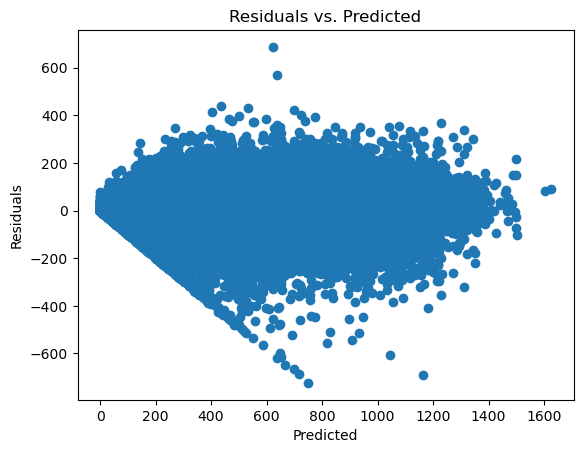

In [134]:
# Convert to DataFrame
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
xgb_predictions_train_df = pd.DataFrame(xgb_predictions_train, columns=['Predicted']).reset_index(drop=True)

# Calculate residuals
residuals = y_train_df['passenger_count'] - xgb_predictions_train_df['Predicted']

# Plot residuals
plt.scatter(xgb_predictions_train_df, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


In [15]:
# plt.hist(residuals, bins=20)
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.title('Distribution of Residuals')
# plt.show()

In [135]:
print(len(y_train))
print(len(xgb_predictions_train))


2126628
2126628


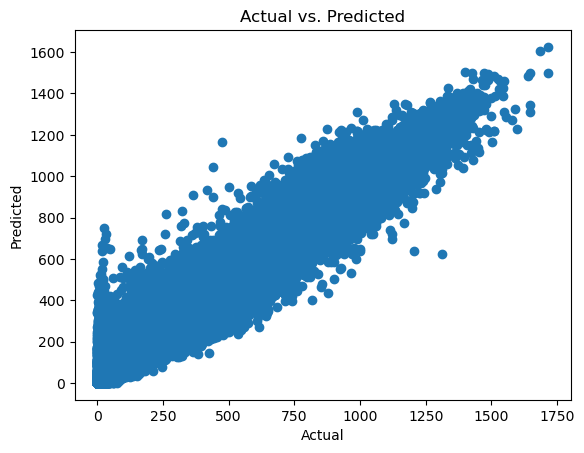

In [136]:
plt.scatter(y_train, xgb_predictions_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


# Evaluate the model using the hold-out (30% examples) test set

In [140]:

# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_test = xgb.predict(X_test).ravel()
xgb_predictions_test[xgb_predictions_test < 0] = 0
y_test_1d = y_test.values.ravel()


df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_test_1d, 'Predicted': xgb_predictions_test})
df_true_vs_xgb_predicted.head(20)


,Actual,Predicted
0,2,1.106084
1,7,13.602592
2,44,62.883228
3,1,2.900221
4,383,360.495880
5,0,0.000000
6,232,209.918304
7,0,0.000000
8,0,1.614312
9,106,110.997093


In [141]:
# Calculate MAE, MSE and RMSE
test_mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_rmse = np.sqrt(mse) # or mse**(0.5) 
test_mape = np.mean(np.abs((df_true_vs_xgb_predicted['Actual'] - df_true_vs_xgb_predicted['Predicted']) / df_true_vs_xgb_predicted['Actual'])) * 100
print("==================== Test Data =======================")
print('Mean Absolute Error (MAE):', test_mae)
print('Mean Squared Error (MSE):', test_mse)
print('Root Mean Squared Error (RMSE):', test_rmse)
print('Mean Absolute Percentage Error (MAPE):', test_mape, '%')

print("==================== Train Data =======================")
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape, '%')

==================== Test Data =======================
Mean Absolute Error (MAE): 7.714497457270999
Mean Squared Error (MSE): 549.5283265992281
Root Mean Squared Error (RMSE): 17.368371362424753
Mean Absolute Percentage Error (MAPE): inf %
==================== Train Data =======================
Mean Absolute Error (MAE): 6.135787926788157
Mean Squared Error (MSE): 301.6603237830963
Root Mean Squared Error (RMSE): 17.368371362424753
Mean Absolute Percentage Error (MAPE): 48.238244009316475 %


In [20]:
import pickle

# save the model to disk
filename = 'final_XGboost_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

# convert dataset into DMatrix for XGBoost to check it's better，the outcome shows it's not better.

In [21]:
# import xgboost as xgb

# # convert your dataset into DMatrix for XGBoost
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)


In [22]:
# # set xgboost parameters
# param = {
#     'max_depth': 3,  # the maximum depth of each tree
#     'eta': 0.3,  # the training step for each iteration
#     'silent': 1,  # logging mode - quiet
#     'objective': 'reg:linear'}  # regression linear

# num_round = 20  # the number of training iterations

# # train the model
# bst = xgb.train(param, dtrain, num_round)


In [23]:
# # Predicted value for all examples, 
# # using the trained model, on in-sample data (same sample used for training and test)
# xgb_predictions_train = bst.predict(dtrain).ravel()
# y_train_1d = y_train.values.ravel()

# df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': xgb_predictions_train})
# df_true_vs_xgb_predicted.head(100)

In [24]:
# # Calculate MAE, MSE and RMSE
# mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
# mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
# rmse = np.sqrt(mse) # or mse**(0.5)  

# print('Mean Absolute Error (MAE):', mae)
# print('Mean Squared Error (MSE):', mse)
# print('Root Mean Squared Error (RMSE):', rmse)

# use lightgbm regression, this model isn't reliable

In [25]:
# from lightgbm import LGBMRegressor


# # instantiate the model

# # lgbm = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)
# lgbm = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1, verbose=-1)

# # record the start time
# start_time = time.time()

# # fit the model
# lgbm.fit(X_train, y_train)

# # calculate and print the time taken
# time_taken = time.time() - start_time
# print(f"Time taken to fit the model: {time_taken} seconds")


In [26]:
# # Predicted value for all examples, 
# # using the trained model, on in-sample data (same sample used for training and test)
# lgbm_predictions_train = lgbm.predict(X_train).ravel()
# y_train_1d = y_train.values.ravel()

# df_true_vs_lgbm_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': lgbm_predictions_train})
# df_true_vs_lgbm_predicted.head(100)


In [27]:
# # Calculate MAE, MSE and RMSE
# train_mae = metrics.mean_absolute_error(df_true_vs_lgbm_predicted['Actual'], df_true_vs_lgbm_predicted['Predicted'])
# train_mse = metrics.mean_squared_error(df_true_vs_lgbm_predicted['Actual'], df_true_vs_lgbm_predicted['Predicted'])
# train_rmse = np.sqrt(mse) # or mse**(0.5)  

# print('Mean Absolute Error (MAE):', train_mae)
# print('Mean Squared Error (MSE):', train_mse)
# print('Root Mean Squared Error (RMSE):', train_rmse)

# try Prophet model, can't run well!!!

In [28]:
# # read in the cleaned csv

# prophet_df = pd.read_csv('train_data_2.2.csv')

# prophet_df

In [29]:
# prophet_df = prophet_df.drop('year_month', axis=1)
# prophet_df = prophet_df.drop('week', axis=1)
# prophet_df = prophet_df.drop('hour', axis=1)
# prophet_df = prophet_df.drop('holiday', axis=1)

# prophet_df

In [30]:
# prophet_df['taxi_zone'] = prophet_df['taxi_zone'].astype('category')
# # prophet_df['year_month'] = prophet_df['year_month'].astype('category')
# # prophet_df['week'] = prophet_df['week'].astype('category')
# # prophet_df['hour'] = prophet_df['hour'].astype('category')
# prophet_df['borough'] = prophet_df['borough'].astype('category')
# # prophet_df['holiday'] = prophet_df['holiday'].astype('category')
# prophet_df['datetime'] = pd.to_datetime(prophet_df['datetime'])
# prophet_df.dtypes

In [31]:
# # set up dummies features
# prophet_df = pd.get_dummies(prophet_df)
# prophet_df.dtypes

In [32]:
# # shuffle the data
# prophet_df = prophet_df.sample(frac=1, random_state=987)
# print(prophet_df.head(5))

In [33]:
# # split data set to training data and test data
# y = pd.DataFrame(prophet_df["passenger_count"])
# X = prophet_df.drop(labels=["passenger_count"], axis=1)

# # divide data into training data and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [34]:
# # need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# X_train.head(5)

In [35]:
# import holidays
# from holidays.countries import UnitedStates
# import fbprophet

# print(holidays.__version__)
# print(fbprophet.__version__)


In [36]:
# import holidays
# from holidays.countries import UnitedStates
# from fbprophet import Prophet


# # Make sure X_train is a DataFrame with 'ds' and 'y' columns
# X_train_df = X_train.rename(columns={'datetime': 'ds', 'passenger_count': 'y'})

# # Instantiate the model
# p_model = Prophet()

# # Add additional regressors
# for col in X_train_df.columns:
#     if col not in ['ds', 'y']:
#         model.add_regressor(col)

# # Record the start time
# start_time = time.time()

# # Fit the model
# p_model.fit(X_train_df)

# # Calculate and print the time taken
# time_taken = time.time() - start_time
# print(f"Time taken to fit the model: {time_taken} seconds")


# try Multi-Layer Perceptron models

In [37]:
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(random_state=1, max_iter=10)

# record the start time
start_time = time.time()

# fit the model
mlp.fit(X_train, y_train)

# calculate and print the time taken
time_taken = time.time() - start_time
print(f"Time taken to fit the model: {time_taken} seconds")


/Users/lalazhou/opt/anaconda3/envs/research_project/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken to fit the model: 133.7492151260376 seconds


/Users/lalazhou/opt/anaconda3/envs/research_project/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [38]:
# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
mlp_predictions_train = mlp.predict(X_train).ravel()
y_train_1d = y_train.values.ravel()

df_true_vs_mlp_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': mlp_predictions_train})
df_true_vs_mlp_predicted.head(100)


,Actual,Predicted
0,19,40.661562
1,4,11.586638
2,0,20.089767
3,155,267.725680
4,0,0.840731
...,...,...
95,3,15.924467
96,2,1.305612
97,21,15.960618
98,0,-2.591402


In [66]:
# Calculate MAE, MSE and RMSE
mae = metrics.mean_absolute_error(df_true_vs_mlp_predicted['Actual'], df_true_vs_mlp_predicted['Predicted'])
mse = metrics.mean_squared_error(df_true_vs_mlp_predicted['Actual'], df_true_vs_mlp_predicted['Predicted'])
rmse = np.sqrt(mse) # or mse**(0.5)  

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 16.899204767769973
Mean Squared Error (MSE): 1501.6808783055699
Root Mean Squared Error (RMSE): 38.751527431903504


# run pickle

In [142]:
loaded_model = pickle.load(open('final_XGboost_model.pkl', 'rb'))
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [143]:
X_test.head(2)

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,0,0,0,2,3,28,36,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,71,3,0,27,28,176,168,1,0,33,...,0,0,0,0,0,0,1,0,0,0


In [144]:
# let's say you have some data in X_test
predictions = loaded_model.predict(X_test)

# print predictions
print(predictions)

[ 1.1060841 13.602592  62.88323   ... 19.433075   7.0057836 -1.5794125]


In [145]:
print(X_test.columns)

Index(['entertainment_and_recreation', 'financial_services',
       'food_and_beverage', 'parking_and_automotive_services',
       'professional_services', 'real_estate', 'retail_services',
       'transportation', 'hospital', 'hotspots',
       ...
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr. Day', 'holiday_Memorial Day',
       'holiday_New Year's Day', 'holiday_New Year's Day (Observed)',
       'holiday_No', 'holiday_Thanksgiving', 'holiday_Veterans Day',
       'holiday_Washington's Birthday'],
      dtype='object', length=335)


# try to run all month data

In [146]:

# read in the cleaned csv

predict_df = pd.read_csv('train_data_2.2.1_change_month.csv')

predict_df

,taxi_zone,datetime,passenger_count,month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0,1,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,2022-01-01 01:00:00,0,1,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2022-01-01 02:00:00,2,1,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,2022-01-01 03:00:00,1,1,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,2022-01-01 04:00:00,8,1,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,2023-04-30 19:00:00,247,4,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,2023-04-30 20:00:00,242,4,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,2023-04-30 21:00:00,210,4,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,2023-04-30 22:00:00,152,4,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


In [147]:
predict_df.dtypes

taxi_zone                           int64
datetime                           object
passenger_count                     int64
month                               int64
week                                int64
hour                                int64
borough                            object
entertainment_and_recreation        int64
financial_services                  int64
food_and_beverage                   int64
parking_and_automotive_services     int64
professional_services               int64
real_estate                         int64
retail_services                     int64
transportation                      int64
hospital                            int64
hotspots                            int64
school                              int64
total_business                      int64
holiday                            object
dtype: object

In [148]:
predict_df['taxi_zone'] = predict_df['taxi_zone'].astype('category')
predict_df['month'] = predict_df['month'].astype('category')
predict_df['week'] = predict_df['week'].astype('category')
predict_df['hour'] = predict_df['hour'].astype('category')
predict_df['holiday'] = predict_df['holiday'].astype('category')
predict_df.dtypes

taxi_zone                          category
datetime                             object
passenger_count                       int64
month                              category
week                               category
hour                               category
borough                              object
entertainment_and_recreation          int64
financial_services                    int64
food_and_beverage                     int64
parking_and_automotive_services       int64
professional_services                 int64
real_estate                           int64
retail_services                       int64
transportation                        int64
hospital                              int64
hotspots                              int64
school                                int64
total_business                        int64
holiday                            category
dtype: object

In [149]:
# Convert the 'datetime' column to datetime format
predict_df['datetime'] = pd.to_datetime(predict_df['datetime'])

# Filter rows based on year and month
# df_2023_jan_feb = predict_df[(predict_df['datetime'].dt.year == 2023) & (predict_df['datetime'].dt.month.isin([1, 2]))]
# df_2023_jan_feb

In [150]:
predict_df = predict_df.drop('datetime', axis=1)
predict_df

,taxi_zone,passenger_count,month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,0,1,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,0,1,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2,1,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,1,1,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,8,1,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,247,4,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,242,4,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,210,4,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,152,4,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


In [151]:
# set up dummies features
predict_df = pd.get_dummies(predict_df)
predict_df.dtypes

passenger_count                      int64
entertainment_and_recreation         int64
financial_services                   int64
food_and_beverage                    int64
parking_and_automotive_services      int64
                                     ...  
holiday_New Year's Day (Observed)    uint8
holiday_No                           uint8
holiday_Thanksgiving                 uint8
holiday_Veterans Day                 uint8
holiday_Washington's Birthday        uint8
Length: 336, dtype: object

In [152]:
for col in predict_df.columns:
    print(col)

passenger_count
entertainment_and_recreation
financial_services
food_and_beverage
parking_and_automotive_services
professional_services
real_estate
retail_services
transportation
hospital
hotspots
school
total_business
taxi_zone_1
taxi_zone_2
taxi_zone_3
taxi_zone_4
taxi_zone_5
taxi_zone_6
taxi_zone_7
taxi_zone_8
taxi_zone_9
taxi_zone_10
taxi_zone_11
taxi_zone_12
taxi_zone_13
taxi_zone_14
taxi_zone_15
taxi_zone_16
taxi_zone_17
taxi_zone_18
taxi_zone_19
taxi_zone_20
taxi_zone_21
taxi_zone_22
taxi_zone_23
taxi_zone_24
taxi_zone_25
taxi_zone_26
taxi_zone_27
taxi_zone_28
taxi_zone_29
taxi_zone_30
taxi_zone_31
taxi_zone_32
taxi_zone_33
taxi_zone_34
taxi_zone_35
taxi_zone_36
taxi_zone_37
taxi_zone_38
taxi_zone_39
taxi_zone_40
taxi_zone_41
taxi_zone_42
taxi_zone_43
taxi_zone_44
taxi_zone_45
taxi_zone_46
taxi_zone_47
taxi_zone_48
taxi_zone_49
taxi_zone_50
taxi_zone_51
taxi_zone_52
taxi_zone_53
taxi_zone_54
taxi_zone_55
taxi_zone_56
taxi_zone_57
taxi_zone_58
taxi_zone_59
taxi_zone_60
taxi_zone_

In [153]:
predict_df

,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,247,69,0,0,37,11,116,108,4,0,...,0,0,0,0,0,0,1,0,0,0
3038036,242,69,0,0,37,11,116,108,4,0,...,0,0,0,0,0,0,1,0,0,0
3038037,210,69,0,0,37,11,116,108,4,0,...,0,0,0,0,0,0,1,0,0,0
3038038,152,69,0,0,37,11,116,108,4,0,...,0,0,0,0,0,0,1,0,0,0


In [154]:
# split data set into the features and target feature
target_feature = pd.DataFrame(predict_df["passenger_count"])
features = predict_df.drop(labels=["passenger_count"], axis=1)
features

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0
3038036,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0
3038037,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0
3038038,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0


In [155]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
target_feature.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0
3038036,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0
3038037,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0
3038038,69,0,0,37,11,116,108,4,0,14,...,0,0,0,0,0,0,1,0,0,0


In [156]:
# make predict
predictions = loaded_model.predict(features)

predictions[predictions < 0] = 0
# print predictions
print(predictions)

[  7.083603    5.200867    7.2553196 ... 301.56372   174.11325
 118.513725 ]


In [157]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['predicted_passenger_count'])

# Reset indices of your target_feature, features DataFrames to align with predictions_df
target_feature.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)

# Concatenate the target_feature, features and predictions dataframes
result = pd.concat([predictions_df, target_feature, features], axis=1)

result


,predicted_passenger_count,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,7.083603,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5.200867,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7.255320,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.560405,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,13.775771,8,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,334.164124,247,69,0,0,37,11,116,108,4,...,0,0,0,0,0,0,1,0,0,0
3038036,286.001373,242,69,0,0,37,11,116,108,4,...,0,0,0,0,0,0,1,0,0,0
3038037,301.563721,210,69,0,0,37,11,116,108,4,...,0,0,0,0,0,0,1,0,0,0
3038038,174.113251,152,69,0,0,37,11,116,108,4,...,0,0,0,0,0,0,1,0,0,0


In [158]:
smallest_value = result['predicted_passenger_count'].min()
largest_value = result['predicted_passenger_count'].max()

print(f"The smallest value in the feature is: {smallest_value}")
print(f"The largest value in the feature is: {largest_value}")


The smallest value in the feature is: 0.0
The largest value in the feature is: 1625.2015380859375


In [57]:
result.to_csv("basic_prediction_all_data.csv", index=False)

In [159]:
# Calculate MAE, MSE and RMSE
mae = metrics.mean_absolute_error(result['passenger_count'], result['predicted_passenger_count'])
mse = metrics.mean_squared_error(result['passenger_count'], result['predicted_passenger_count'])
rmse = np.sqrt(mse) # or mse**(0.5)  

# Calculate MAPE
epsilon = 1  # Small constant to avoid division by zero
mape = np.mean(np.abs((result['passenger_count'] - result['predicted_passenger_count']) / (result['passenger_count'] + epsilon))) * 100

# Calculate the arctangent absolute percentage error for each observation
atans = np.arctan(np.abs(((result['passenger_count'] + epsilon) - (result['predicted_passenger_count']+ epsilon)) / (result['passenger_count'] + 1e-6)))
# Calculate the mean arctangent absolute percentage error
maape = np.mean(atans) * 100

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape, '%')
print('Mean Arctangent Absolute Percentage Error (MAAPE):', maape, '%')

# Calculate the numerator and denominator separately
numerator = np.abs(result['passenger_count'] - result['predicted_passenger_count'])
denominator = (np.abs(result['passenger_count']) + np.abs(result['predicted_passenger_count'])) / 2

# Use a small constant in the denominator to avoid division by zero
epsilon = 1e-6

# Calculate sMAPE
smape = np.mean(numerator / (denominator + epsilon)) * 100

print('Symmetric Mean Absolute Percentage Error (sMAPE):', smape, '%')

Mean Absolute Error (MAE): 6.609400785933017
Mean Squared Error (MSE): 376.02072462793564
Root Mean Squared Error (RMSE): 19.391253817841065
Mean Absolute Percentage Error (MAPE): 49.34508752539635 %
Mean Arctangent Absolute Percentage Error (MAAPE): 66.35849668602935 %
Symmetric Mean Absolute Percentage Error (sMAPE): 82.80546920088526 %
